In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
# https://www.udemy.com/cluster-analysis-unsupervised-machine-learning-python
# from __future__ import print_function, division
# from future.utils import iteritems
# from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

In [1]:
%config Completer.use_jedi=False

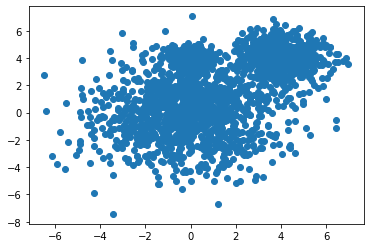

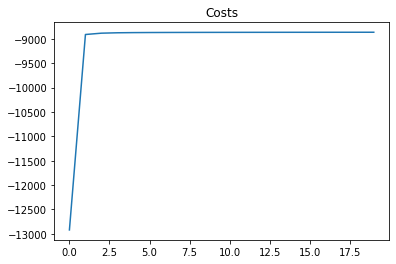

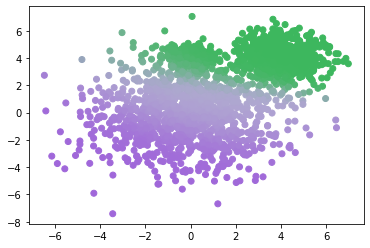

pi: [0.22589174 0.43466493 0.33944333]
means: [[-0.62515804 -1.46859867]
 [ 2.85355831  3.95019876]
 [ 0.22823603  0.6920039 ]]
covariances: [[[ 4.70580795 -0.45289223]
  [-0.45289223  3.02009464]]

 [[ 4.09352778  0.09823338]
  [ 0.09823338  0.85443422]]

 [[ 3.27818741 -0.35396439]
  [-0.35396439  2.53770825]]]


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal


def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    pi = np.ones(K) / K # uniform

    # initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)

    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K)) # we'll use these to store the PDF value of sample n and Gaussian k
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # this is the slow way
        # for k in range(K):
        #     for n in range(N):
        #         weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])

        # for k in range(K):
        #     for n in range(N):
        #         R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()

        # a faster way to do step 1: "vectorization"
        for k in range(K):
            weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk

            ## faster
            delta = X - M[k] # N x D
            Rdelta = np.expand_dims(R[:,k], -1) * delta # multiplies R[:,k] by each col. of delta - N x D
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*smoothing # D x D
            ## slower
            # C[k] = np.sum(R[n,k]*np.outer(X[n] - M[k], X[n] - M[k]) for n in range(N)) / Nk + np.eye(D)*smoothing


        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break

    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R


def main():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 2000 # number of samples
    X = np.zeros((N, D))
    X[:1200, :] = np.random.randn(1200, D)*2 + mu1
    X[1200:1800, :] = np.random.randn(600, D) + mu2
    X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

    # what does it look like without clustering?
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K = 3
    gmm(X, K)



if __name__ == '__main__':
    main()


In [30]:
# Need to compare above results with regular Soft K-Means !
# ? use LazyP's Soft K-Means code or sklearn ?

In [31]:
D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 2000 # number of samples
X = np.zeros((N, D))
X[:1200, :] = np.random.randn(1200, D)*2 + mu1
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

In [3]:
# from AZ Course:

from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)